<a href="https://colab.research.google.com/github/Chaabane2k03/Data_PreprocessingATIA/blob/main/Data_Preprocessing_in_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div class="alert alert-block alert-success" dir="rtl" style="text-align: center;"><strong><span style="font-size: 20pt">Data PreProcessing <br /></span></strong></div>

# <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2021/08/584692017-PGHD.jpg" />


# <font color='blue'>Summary:</font>
1- Acquire the dataset

2- Import all the crucial libraries

3- Import the dataset

4- **Data Preprocessing**

5- Splitting the dataset

6- Feature Engineering

**Data preprocessing in Machine Learning is a crucial step that helps enhance the quality of data to promote the extraction of meaningful insights from the data. Data preprocessing in Machine Learning refers to the technique of preparing (cleaning and organizing) the raw data to make it suitable for a building and training Machine Learning models. In simple words, data preprocessing in Machine Learning is a data mining technique that transforms raw data into an understandable and readable format**

# <font color='darkcyan'>Why Data Preprocessing in Machine Learning?</font>
When it comes to creating a Machine Learning model, data preprocessing is the first step marking the initiation of the process. Typically, real-world data is incomplete, inconsistent, inaccurate (contains errors or outliers), and often lacks specific attribute values/trends. This is where data preprocessing enters the scenario – it helps to clean, format, and organize the raw data, thereby making it ready-to-go for Machine Learning models. Let’s explore various steps of data preprocessing in machine learning.

# <font color='darkcyan'>1- Acquire the dataset</font>
Acquiring the dataset is the first step in data preprocessing in machine learning. To build and develop Machine Learning models, you must first acquire the relevant dataset. This dataset will be comprised of data gathered from multiple and disparate sources which are then combined in a proper format to form a dataset. Dataset formats differ according to use cases. For instance, a business dataset will be entirely different from a medical dataset. While a business dataset will contain relevant industry and business data, a medical dataset will include healthcare-related data.

# <font color='darkcyan'>2- Import all the crucial libraries</font>
The predefined Python libraries can perform specific data preprocessing jobs. Importing all the crucial libraries is the second step in data preprocessing in machine learning.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn import metrics

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# <font color='darkcyan'>3- Import the dataset</font>
In this step, you need to import the dataset/s that you have gathered for the ML project at hand. Importing the dataset is one of the important steps in data preprocessing in machine learning.


In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Medical Student Dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "bninaayoub/medical-students-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


<ipython-input-1-11d5394d62a3>:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 21.2M/21.2M [00:00<00:00, 37.7MB/s]


In [ ]:
df.sample(5)

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
164850,64851.0,24.0,Female,174.369717,66.137659,A,21.752375,98.229594,85.0,NaN,224.0,No,NaN
124795,24796.0,27.0,Female,189.512307,97.849345,O,27.244766,NaN,65.0,125.0/102.0,130.0,No,No
69291,69292.0,29.0,Male,188.525120,90.860512,AB,25.564466,98.797742,72.0,NaN,120.0,No,No
56168,56169.0,24.0,Male,193.989607,67.083819,B,NaN,98.167127,90.0,132.0/106.0,134.0,No,NaN
155416,55417.0,33.0,Female,198.088628,52.184702,O,13.299157,98.946574,70.0,102.0/71.0,124.0,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  object 
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(8), object(5)
memory usage: 19.8+ MB


In [ ]:
df.describe()

,Student ID,Age,Height,Weight,BMI,Temperature,Heart Rate,Cholesterol
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,49974.042078,26.021561,174.947103,69.971585,23.338869,98.600948,79.503767,184.486361
std,28879.641657,4.890528,14.447560,17.322574,7.033554,0.500530,11.540755,37.559678
min,1.000000,18.000000,150.000041,40.000578,10.074837,96.397835,60.000000,120.000000
25%,24971.750000,22.000000,162.476110,54.969838,17.858396,98.264750,70.000000,152.000000
50%,49943.500000,26.000000,174.899914,69.979384,22.671401,98.599654,80.000000,184.000000
75%,74986.000000,30.000000,187.464417,84.980097,27.997487,98.940543,90.000000,217.000000
max,100000.000000,34.000000,199.998639,99.999907,44.355113,100.824857,99.000000,249.000000


In [ ]:
print("Number of duplicated Values:",df.duplicated().sum())

Number of duplicated Values: 343


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Gender', 'Blood Type', 'Blood Pressure', 'Diabetes', 'Smoking']

In [ ]:
for col in categorical_cols:
    print("Unique values for column", col,":", df[col].unique())

Unique values for column Gender : ['Female' 'Male' nan]
Unique values for column Blood Type : ['O' 'B' 'A' 'AB' nan]
Unique values for column Blood Pressure : ['109.0/89.0' '104.0/79.0' '130.0/113.0' ... '135.0/95.0' '119.0/76.0'
 '136.0/104.0']
Unique values for column Diabetes : ['No' 'Yes' nan]
Unique values for column Smoking : [nan 'No' 'Yes']


## Defining Data Quality Issues

The dataset exhibits the following data quality issues, which need to be addressed before modeling:

**1. Missing Values:**

* **Significant Missingness:** 20,000 rows (10%) are missing across all columns.
* **Columns Affected:** 'Student ID', 'Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI', 'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol', 'Diabetes', and 'Smoking' all have 20,000 missing values.

**2. Data Type Inconsistencies:**

* **Student ID:** `Student ID` is of type `float64`, but it should be an integer as it represents unique identifiers.
* **Age:** `Age` is also of type `float64`, but it likely represents whole years, so it should be converted to `int64`.
* **Blood Pressure:** `Blood Pressure` Values are of type object as they represent two variables, they must seperated and converted to `int64`

**3. Categorical Data Inconsistencies (Object Type Columns):**

* **Gender, Blood Type, Diabetes, Smoking:** These columns are of type `object`, indicating they contain categorical data (strings).
* **Potential Issues:**
    * Missing values (NaNs) are present.

**4. Existance of Duplicates:**
* This dataset presents a data integrity issue due to the presence of duplicated rows for the entire subset but the contact column.

**5. Combined Variables:**
   * Contact Information: The 'Blood Pressure' column combines multiple pieces of contact information (phone, email, or both) into a single string.


**4. Tidiness:**

* **Tidy Data Format:** The data is in a tidy format, with one variable per column and one observation per row.
* **Messiness:** The missing values, data type inconsistencies and combined variables introduce messiness that needs to be cleaned up.

In [ ]:
df_clean = df.copy()

### **Define**
Handling Duplicate values

### **Code**

In [ ]:
df_clean.duplicated(subset='Student ID', keep='first').sum()

101023

In [ ]:
non_nan_mask = pd.notna(df_clean['Student ID'])

duplicates = df_clean[non_nan_mask].duplicated(subset='Student ID', keep='first')

In [ ]:
duplicate_indices = duplicates[duplicates].index

In [ ]:
duplicate_indices

Index([], dtype='int64')

In [ ]:
df_clean = df_clean.drop(duplicate_indices)
df_clean.duplicated(subset='Student ID', keep='first').sum()

0

In [ ]:
df_clean[df_clean.duplicated(subset = df_clean.columns.difference(["Student ID"]), keep = False)]

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
3,4,30,Male,182,63,B,19.019442,98.839605,99.0,112.0/91.0,141.0,No,Yes
178,179,25,Male,157,58,AB,23.530366,98.262963,NaN,NaN,151.0,No,No
219,220,29,Female,175,84,AB,27.428571,98.627077,92.0,101.0/62.0,164.0,No,No
223,224,25,Female,167,95,A,34.063609,98.177719,69.0,118.0/76.0,125.0,No,No
391,392,21,Male,171,58,O,19.835163,98.381320,83.0,NaN,156.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199377,199378,26,Female,159,99,A,39.159843,97.700872,75.0,126.0/103.0,164.0,No,No
199409,199410,24,Female,199,98,O,24.746850,98.460201,79.0,NaN,231.0,No,No
199740,199741,20,Female,175,54,B,17.632653,98.372762,66.0,124.0/74.0,147.0,No,Yes
199816,199817,30,Female,155,92,AB,38.293444,97.881481,88.0,NaN,172.0,No,No


In [ ]:
df_clean = df_clean.drop_duplicates(subset = df_clean.columns.difference(["Student ID"]), keep = 'first')

### **Test**

In [ ]:
df_clean[df_clean.duplicated(subset='Student ID', keep='first')].head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking


In [ ]:
df_clean[df_clean.duplicated(subset = df_clean.columns.difference(["Student ID"]), keep = False)]

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking


## **Missing Values**
# <img src="https://files.realpython.com/media/Pythons-None-Type-Null-in-Python_Watermarked.9d48d487f417.jpg" width="70%"/>

In data preprocessing, it is pivotal to identify and correctly handle the missing values, failing to do this, you might draw inaccurate and faulty conclusions and inferences from the data. Needless to say, this will hamper your ML project.

some typical reasons why data is missing:

A. User forgot to fill in a field.

B. Data was lost while transferring manually from a legacy database.

C. There was a programming error.

D. Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.


### **Define**
Imputing Missing Values and fixing data type inconsistencies

### **Code**

In [ ]:
print(df_clean.shape)

(200000, 13)


In [ ]:
df_clean.isnull().sum()

,0
Student ID,20000
Age,20000
Gender,20000
Height,20000
Weight,20000
Blood Type,20000
BMI,20000
Temperature,20000
Heart Rate,20000
Blood Pressure,20000


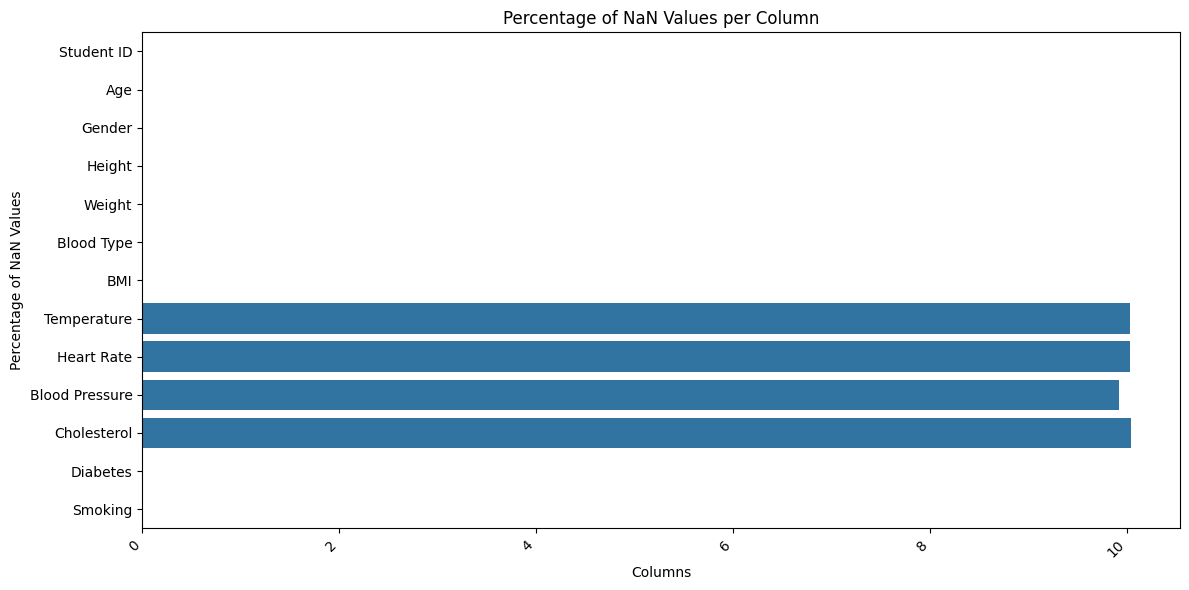

In [ ]:
nan_percentages = (df_clean.isnull().sum() / len(df_clean)) * 100
plt.figure(figsize=(12, 6))
sns.barplot(y=nan_percentages.index, x=nan_percentages.values, color = sns.color_palette()[0])
plt.title('Percentage of NaN Values per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of NaN Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

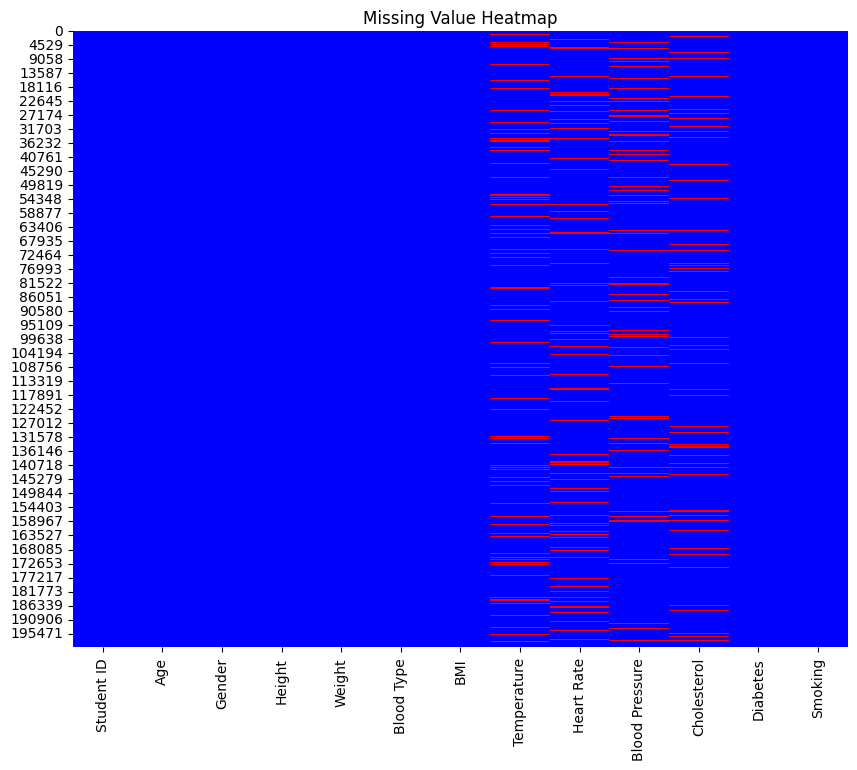

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.isnull(), cbar=False, cmap=['blue', 'red'])
plt.title('Missing Value Heatmap')
plt.show()

In [ ]:
df_clean[df_clean.isnull().all(axis=1)]

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking


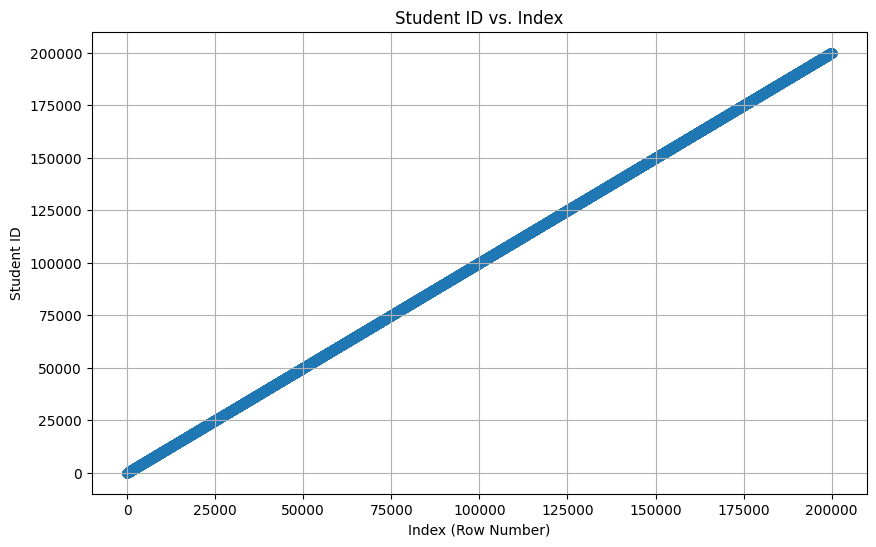

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean.index, df_clean['Student ID'])
plt.title('Student ID vs. Index')
plt.xlabel('Index (Row Number)')
plt.ylabel('Student ID')
plt.grid(True)
plt.show()

In [ ]:
df_clean['Student ID'] = df_clean.index + 1

In [ ]:
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].mode()[0]).astype("int32")
df_clean['Height'] = df_clean['Height'].fillna(df_clean['Height'].mean()).astype("int32")
df_clean['Weight'] = df_clean['Weight'].fillna(df_clean['Weight'].mean()).astype("int32")

In [ ]:
df_clean['BMI'] = df_clean['Weight'] / (df_clean['Height']/100)**2

In [ ]:
df_clean['Gender'] = df_clean['Gender'].fillna(df_clean['Gender'].mode()[0]).astype("category")
df_clean['Smoking'] = df_clean['Smoking'].fillna(df_clean['Smoking'].mode()[0]).astype("category")
df_clean['Diabetes'] = df_clean['Diabetes'].fillna(df_clean['Diabetes'].mode()[0]).astype("category")
df_clean['Blood Type'] = df_clean['Blood Type'].fillna('Unknown')

### **Test**

In [ ]:
df_clean.tail()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
199995,199996,24,Male,176,95,B,30.668905,99.170685,65.0,121.0/95.0,130.0,No,No
199996,199997,29,Female,163,45,Unknown,16.937032,97.865785,62.0,125.0/87.0,198.0,No,Yes
199997,199998,34,Female,174,99,Unknown,32.699168,98.768210,60.0,90.0/71.0,154.0,No,No
199998,199999,30,Female,156,50,A,20.545694,98.994212,61.0,106.0/83.0,225.0,No,No
199999,200000,20,Female,153,99,O,42.291426,98.595817,95.0,133.0/79.0,132.0,No,No


from matplotlib import pyplot as plt
_df_0['Student ID'].plot(kind='hist', bins=20, title='Student ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Height'].plot(kind='hist', bins=20, title='Height')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Weight'].plot(kind='hist', bins=20, title='Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Blood Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Blood Pressure').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Student ID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Age', y='Height', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Height', y='Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Weight', y='BMI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Student ID']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Student ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Blood Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Blood Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Student ID')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Student ID']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Student ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Blood Pressure')):
  _plot_series(series, series_name, i)
  fig.legend(title='Blood Pressure', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Student ID')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Student ID']
  ys = series['Height']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Student ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Blood Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Blood Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Student ID')
_ = plt.ylabel('Height')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Student ID']
  ys = series['Height']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Student ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Blood Pressure')):
  _plot_series(series, series_name, i)
  fig.legend(title='Blood Pressure', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Student ID')
_ = plt.ylabel('Height')

from matplotlib import pyplot as plt
_df_14['Student ID'].plot(kind='line', figsize=(8, 4), title='Student ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Height'].plot(kind='line', figsize=(8, 4), title='Height')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Weight'].plot(kind='line', figsize=(8, 4), title='Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Blood Pressure'].value_counts()
    for x_label, grp in _df_18.groupby('Blood Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Blood Type')
_ = plt.ylabel('Blood Pressure')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Blood Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Student ID', y='Blood Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Blood Pressure'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Student ID', y='Blood Pressure', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Blood Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='Age', y='Blood Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Blood Pressure'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='Age', y='Blood Pressure', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

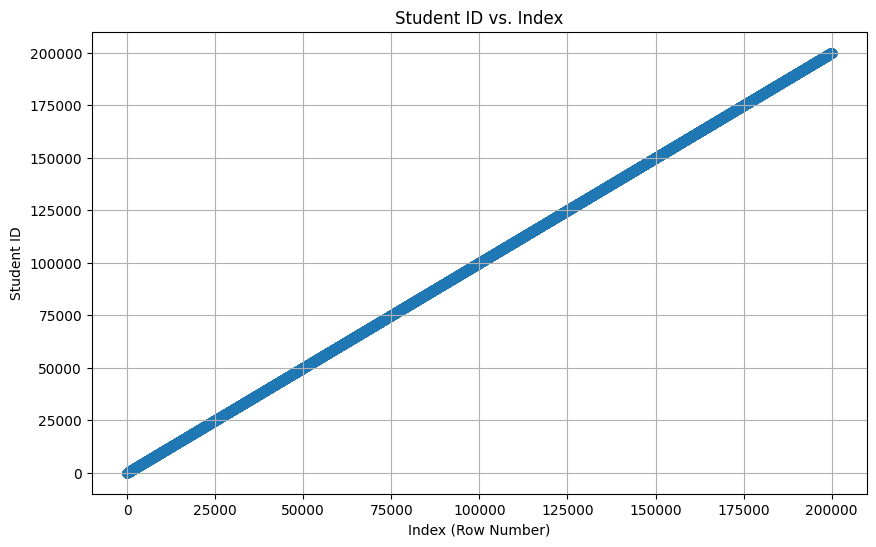

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean.index, df_clean['Student ID'])
plt.title('Student ID vs. Index')
plt.xlabel('Index (Row Number)')
plt.ylabel('Student ID')
plt.grid(True)
plt.show()

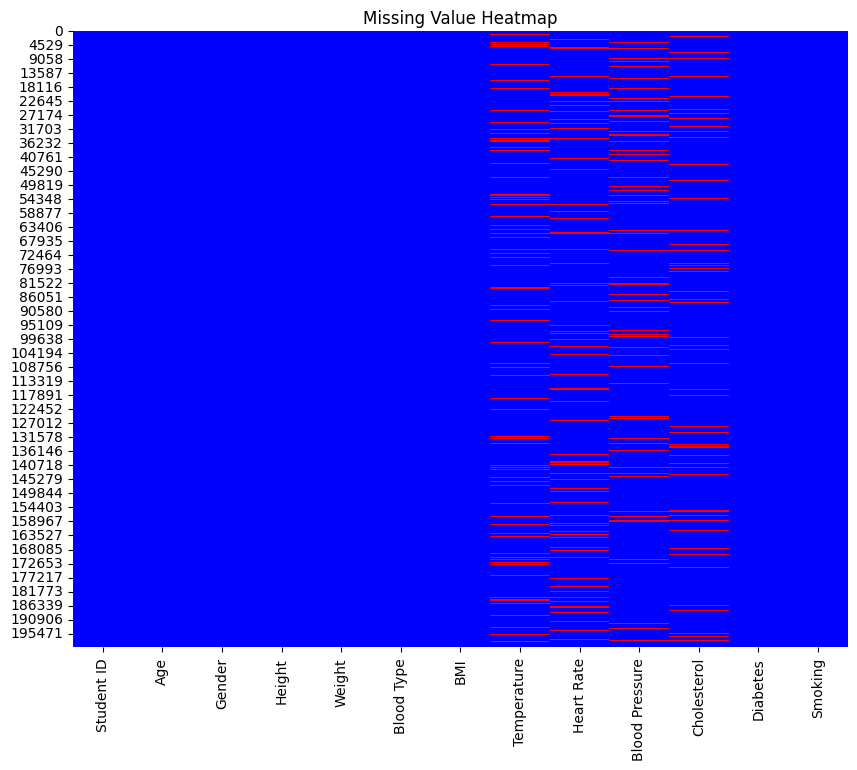

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.isnull(), cbar=False, cmap=['blue', 'red'])
plt.title('Missing Value Heatmap')
plt.show()

#### **Define**
Fixing Combined variables in the `Blood Pressure` Column

#### **Code**


In [ ]:
df_clean[['Systolic', 'Diastolic']] = (
    df_clean['Blood Pressure']
    .str.split('/', expand=True)
    .replace('', pd.NA)
    .astype(float)
)
df_clean = df_clean.drop('Blood Pressure', axis=1)

#### **Test**


In [ ]:
df_clean.columns

Index(['Student ID', 'Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI',
       'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol',
       'Diabetes', 'Smoking'],
      dtype='object')

In [ ]:
df_clean.iloc[:5, -2:]

,Diabetes,Smoking
0,No,No
1,No,No
2,Yes,No
3,No,Yes
4,No,No


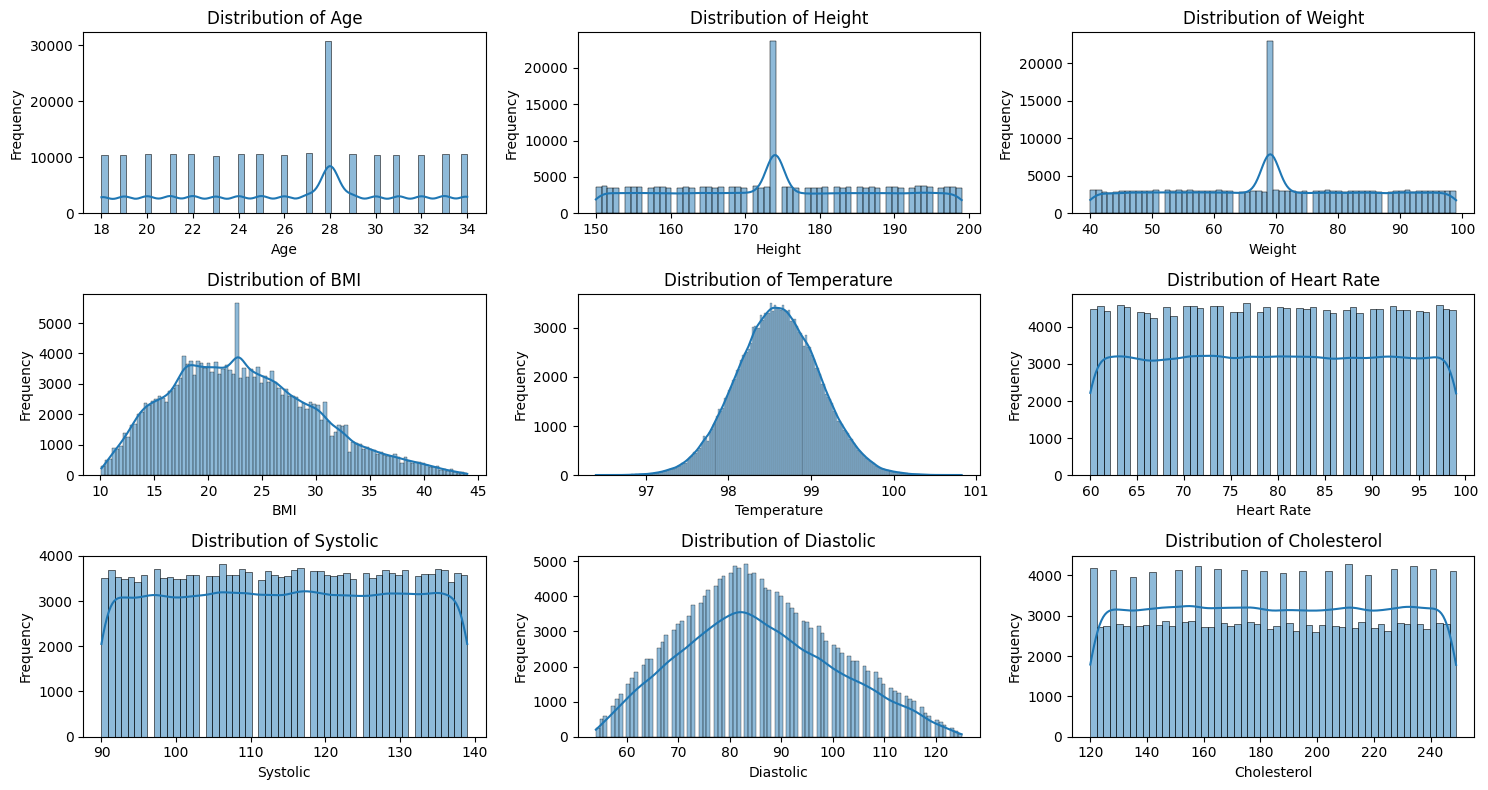

In [ ]:
numerical_features = ['Age', 'Height', 'Weight', 'BMI', 'Temperature', 'Heart Rate',
                      'Systolic', 'Diastolic', 'Cholesterol']

plt.figure(figsize=(15, 8))

for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_clean[feature], kde = True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# <font color='royalblue'> Multiple Imputation by Chained Equations (MICE for short) </font>

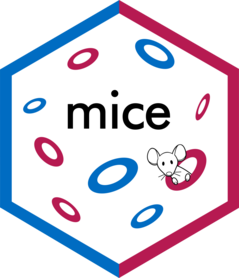

***Multiple Imputation by Chained Equations (MICE for short) is one of the most popular imputation methods in multivariate imputation. This is a multivariate imputation technique, meaning that the missing information is filled by taking into consideration the information from the other columns.***

In [ ]:
!pip install miceforest

### **Define**

Our dataset contains missing values within numerical features, which can hinder accurate analysis and modeling.

**Solution:** We will employ Multiple Imputation by Chained Equations (MICE) to estimate and impute these missing values.

**Steps:**

1.  **Categorical Encoding:** We will encode categorical features into a numerical representation using the `pandas.get_dummies` method.

2.  **MICE Imputation:** **MICE** will leverage the relationships between these numerical columns to estimate and fill in the missing values. Assuming our categorical variables have been appropriately encoded.

In [ ]:
df_encoded = pd.get_dummies(df_clean.drop(["Diabetes"], axis = 1))
df_encoded["Diabetes"] = df_clean["Diabetes"].apply(lambda x: 1 if x == "Yes" else (0 if x == "No" else x))
df_encoded = df_encoded.reset_index(drop = True)

In [ ]:
!pip install miceforest

In [ ]:
from miceforest import ImputationKernel

mice_kernel = ImputationKernel(
data = df_encoded,
random_state = 1991
)

In [ ]:
mice_kernel.mice(2)
mice_imputation = mice_kernel.complete_data()

## **Test**

In [ ]:
mice_imputation.head()

,Student ID,Age,Height,Weight,BMI,Temperature,Heart Rate,Cholesterol,Systolic,Diastolic,Gender_Female,Gender_Male,Blood Type_A,Blood Type_AB,Blood Type_B,Blood Type_O,Blood Type_Unknown,Smoking_No,Smoking_Yes,Diabetes
0,1,18,161,72,27.776706,99.604076,95.0,203.0,109.0,89.0,True,False,False,False,False,True,False,True,False,0
1,2,28,152,47,20.342798,98.714977,93.0,163.0,104.0,79.0,False,True,False,False,True,False,False,True,False,0
2,3,32,182,55,16.604275,98.260293,76.0,216.0,130.0,113.0,True,False,True,False,False,False,False,True,False,1
3,4,30,182,63,19.019442,98.839605,99.0,141.0,112.0,91.0,False,True,False,False,True,False,False,False,True,0
4,5,23,174,46,15.193553,98.480008,95.0,231.0,90.0,88.0,True,False,False,False,False,True,False,True,False,0


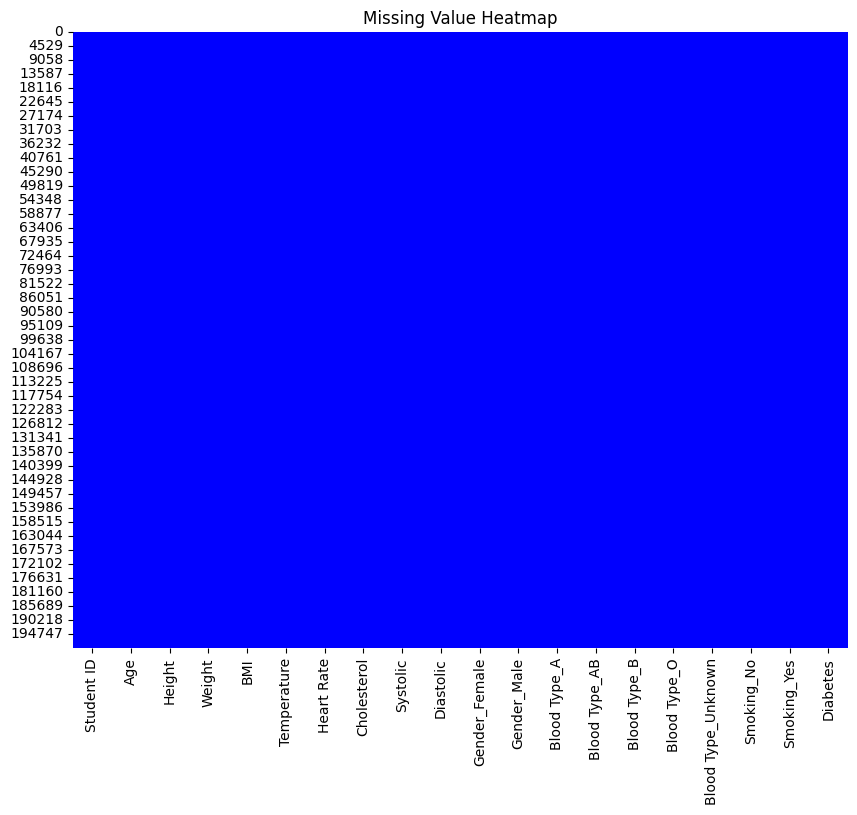

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(mice_imputation.isnull(), cbar=False, cmap=['blue', 'red'])
plt.title('Missing Value Heatmap')
plt.show()

In [ ]:
imputed_columns = ["Temperature", "Heart Rate",'Systolic', 'Diastolic', "Cholesterol"]

df_clean[imputed_columns] = mice_imputation[imputed_columns]

In [ ]:
df_clean.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1,18,Female,161,72,O,27.776706,NaN,95.0,109.0/89.0,203.0,No,No
1,2,28,Male,152,47,B,20.342798,98.714977,93.0,104.0/79.0,163.0,No,No
2,3,32,Female,182,55,A,16.604275,98.260293,76.0,130.0/113.0,216.0,Yes,No
3,4,30,Male,182,63,B,19.019442,98.839605,99.0,112.0/91.0,141.0,No,Yes
4,5,23,Female,174,46,O,15.193553,98.480008,95.0,NaN,231.0,No,No


### **Define**
Checking and Handling Outliers

### **Code**

<Figure size 1500x1500 with 0 Axes>

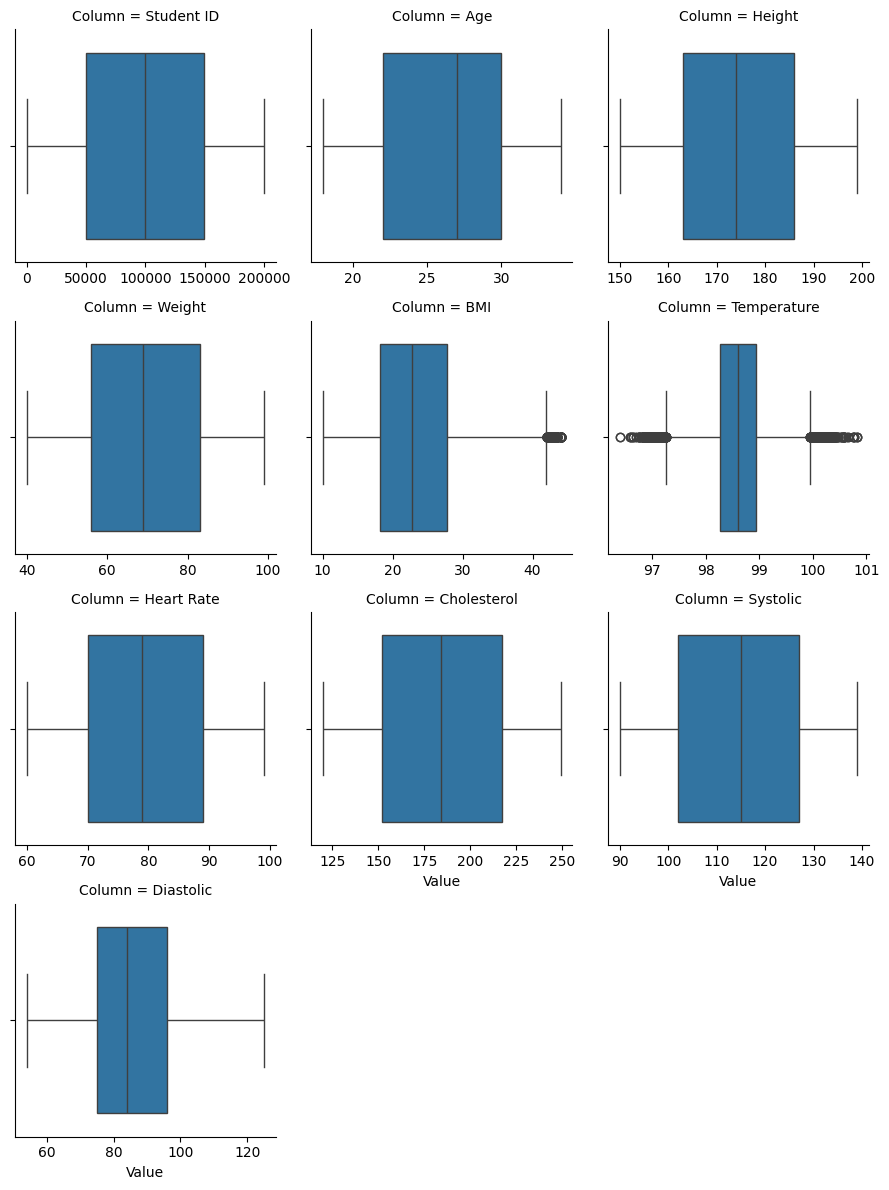

In [ ]:
numerical_cols = df_clean.select_dtypes(include=np.number).columns.tolist()
df_melted = df_clean[numerical_cols].melt(var_name='Column', value_name='Value')

plt.figure(figsize=(15,15))
g = sns.FacetGrid(df_melted, col='Column', col_wrap=3, sharex=False)
g.map(sns.boxplot, 'Value')

In [ ]:
threshold = 3
outlier_indices = {}
for col in numerical_cols:
    z = np.abs(stats.zscore(df_clean[col]))
    outliers = np.where(z > threshold)[0]
    if len(outliers)>0:
        outlier_indices[col] = outliers.tolist()
        print(f"Outliers in {col} (Z-score > {threshold}): {len(outliers)}")

Outliers in BMI (Z-score > 3): 167


In [ ]:
# prompt: I want to visualize the BMI values row of the z score result of the previous cell

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'z_scores' is a pandas Series containing the z-scores for BMI
# Replace this with your actual z-score data
z_scores = df_clean['BMI'].apply(lambda x: (x - df_clean['BMI'].mean()) / df_clean['BMI'].std())


plt.figure(figsize=(10, 6))
sns.histplot(z_scores, kde=True)
plt.title('Distribution of Z-scores for BMI')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.show()


### **Exploratory Data Analysis (EDA): 🔍**

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['BMI'], kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Temperature'], kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Cholesterol'], kde=True)
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Temperature', data=df_clean)
plt.title('Weight vs. BMI')
plt.xlabel('Weight')
plt.ylabel('BMI')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight', y='BMI', data=df_clean)
plt.title('Weight vs. BMI')
plt.xlabel('Weight')
plt.ylabel('BMI')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height', y='BMI', data=df_clean)
plt.title('Height vs. BMI')
plt.xlabel('Height')
plt.ylabel('BMI')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diabetes', y='Cholesterol', data=df_clean)
plt.title('Cholesterol by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Cholesterol')
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Diabetes', y='BMI', data=df_clean)
plt.title('BMI by Diabetes Status')
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes', data=df_clean, hue= 'Smoking')
plt.title('Countplot Diabetes vs Smoking')
plt.ylabel('Count')
plt.xlabel('Diabetes')
plt.show()

In [ ]:
plt.figure(figsize=(10,9))
smoking_counts = df_clean.groupby(['Gender', 'Smoking']).size().reset_index(name='Count')
smoking_counts = smoking_counts[smoking_counts['Smoking'] == 'Yes']
ax = sns.barplot(x='Gender', y='Count', data=smoking_counts)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Number of Smokers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Smokers')
plt.show()

In [ ]:
numeric_df = df_clean.select_dtypes(include=['number'])
if not numeric_df.empty:
    correlation_matrix = numeric_df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

# <font color='aqua'>6- Splitting the dataset</font>
Splitting the dataset is the next step in data preprocessing in machine learning. Every dataset for Machine Learning model must be split into two separate sets – training set and test set.

# <img src="https://files.realpython.com/media/Splitting-Datasets-With-sklearns-train_test_split_Watermarked.13dcac93b15d.jpg" width="75%"/>


In [ ]:
mice_imputation.columns

NameError: name 'mice_imputation' is not defined

In [ ]:
mice_imputation

In [ ]:
df_encoded = mice_imputation.drop(["Student ID", "Height", "Weight", "Blood Type_A", "Blood Type_AB", "Blood Type_B", "Blood Type_O",
                                   "Blood Type_Unknown"], axis = 1)
X = df_encoded.drop('Diabetes', axis=1).values
y = df_encoded['Diabetes'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print("length of training set:", len(X_train))
print("length of testing set:", len(X_test))

# <font color='lightskyblue'>7- Feature scaling</font>
Feature scaling marks the end of the data preprocessing in Machine Learning. It is a method to standardize the independent variables of a dataset within a specific range. In other words, feature scaling limits the range of variables so that you can compare them on common grounds.

Another reason why feature scaling is applied is that few algorithms like gradient descent converge much faster with feature scaling than without it.

# <img src="https://miro.medium.com/max/876/1*dGXqtJOKa_Tbvt9nL3H7KQ.jpeg" width="50%"/>


# <font color='pink'>Why feature scalling? </font>
Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem.

If left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, 5kg and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

# <img src="https://miro.medium.com/max/640/1*EyPd0sQxEXtTDSJgu72JNQ.jpeg" width="40%"/>


# <font color='orchid'>When to Use Feature Scalling? </font>

<font color='red'>k-nearest neighbors   </font> with an Euclidean distance measure is sensitive to magnitudes and hence should be scaled for all features to weigh in equally.

Scaling is critical, while performing <font color='red'>Principal Component Analysis(PCA)</font>. PCA tries to get the features with maximum variance and the variance is high for high magnitude features. This skews the PCA towards high magnitude features.

We can speed up <font color='red'>gradient descent</font> by scaling. This is because θ will descend quickly on small ranges and slowly on large ranges, and so will oscillate inefficiently down to the optimum when the variables are very uneven.

<font color='red'>Tree based models</font> are not distance based models and can handle varying ranges of features. Hence, Scaling is not required while modelling trees.

Algorithms like <font color='red'>Linear Discriminant Analysis(LDA)</font>, <font color='red'>Naive Bayes</font> are by design equipped to handle this and gives weights to the features accordingly. Performing a features scaling in these algorithms may not have much effect.

# <font>MinMax Scaler</font>
MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.

# <img src="https://miro.medium.com/max/1838/1*QjZVCDwW1TMFTWF3rubemQ@2x.png" width="50%"/>


In [ ]:
X_train[:,:8]

In [ ]:
minmax = MinMaxScaler()
X_train_mm = minmax.fit_transform(X_train)
X_test_mm = minmax.transform(X_test)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

# <font>Standard Scaler</font>
StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.

# <img src="https://journaldev.nyc3.digitaloceanspaces.com/2020/10/Standardization.png" width="50%"/>


In [ ]:
scaler = StandardScaler()
X_train_sta = scaler.fit_transform(X_train)
X_test_sta = scaler.transform(X_test)

In [ ]:
print("X_train shape:", X_train_sta.shape)
print("X_test shape:", X_test_sta.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

In [ ]:
clf = LogisticRegression(max_iter=10000, random_state=42)
clf.fit(X_train_sta, y_train)

In [ ]:
y_pred = clf.predict(X_test_sta)
acc = accuracy_score(y_test, y_pred) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')